In [1]:
import os
from glob import glob

from IPython.display import Markdown, display

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.stats
import scipy.signal

import pydicom

import pymedphys.level1.dcmutilities as dcmutilities

In [4]:
dicom_data_directory = '../../../data/collapsedcone/dicom'
keys = ['10x10', '40x40']

In [5]:
fluence_dicom_files = {
    key: glob(os.path.join(
        dicom_data_directory, 'FLUENCE*{}*.dcm').format(key))[0]
    for key in keys
}
fluence_dicom_files

{'10x10': '../../../data/collapsedcone/dicom\\FLUENCE_06MV10x10_Dose.dcm',
 '40x40': '../../../data/collapsedcone/dicom\\FLUENCE_06MV40x40_Dose.dcm'}

In [6]:
reference_dose_files = {
    key: glob(os.path.join(
        dicom_data_directory, 'QABOX*{}*.dcm').format(key))[0]
    for key in keys
}
reference_dose_files

{'10x10': '../../../data/collapsedcone/dicom\\QABOX_06MV10x10_Dose.dcm',
 '40x40': '../../../data/collapsedcone/dicom\\QABOX_06MV40x40_Dose.dcm'}

In [7]:
# dcm_box = {
#     key: pydicom.read_file(reference_dose_files[key], force=True)
#     for key in keys
# }

# # dose_box = {
# #     key: dcmutilities.load_dose_from_dicom(dcm_box[key])
# #     for key in keys
# # }

# coords_box = {
#     key: dcmutilities.load_xyz_from_dicom(dcm_box[key])
#     for key in keys
# }

In [8]:
# len(coords_box['10x10'][0]), len(coords_box['10x10'][1]), len(coords_box['10x10'][2])

In [9]:
# x, y, z = dcmutilities.load_xyz_from_dicom(
#     pydicom.read_file(reference_dose_files['10x10'], force=True))
# xx, yy, zz = np.meshgrid(x, y, z)

In [10]:
# source_position = [0, -1000, 0] # x, y, z
# surface_position = -100 # y

# distance_to_source = np.sqrt(
#     (xx - source_position[0]) ** 2 + 
#     (yy - source_position[1]) ** 2 + 
#     (zz - source_position[2]) ** 2
# )

In [11]:
# distance_to_surface = distance_to_source * (yy - surface_position) / (yy - source_position[1])
# off_axis_distance = np.sqrt((xx - source_position[0]) ** 2 + (zz - source_position[2]) ** 2)

In [12]:
dcm_fluence = {
    key: pydicom.read_file(fluence_dicom_files[key], force=True)
    for key in keys
}

dose_fluence = {
    key: dcmutilities.load_dose_from_dicom(dcm_fluence[key])
    for key in keys
}

coords_fluence = {
    key: dcmutilities.load_xyz_from_dicom(dcm_fluence[key])
    for key in keys
}

In [13]:
approx_fluence = {
    key: np.swapaxes(np.mean(dose_fluence[key][1:3,:,:], axis=0), 0, 1)
    for key in dose_fluence
}

## Approximate Agility Head Fluence

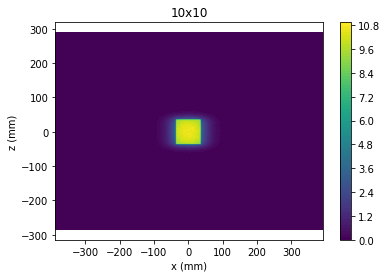

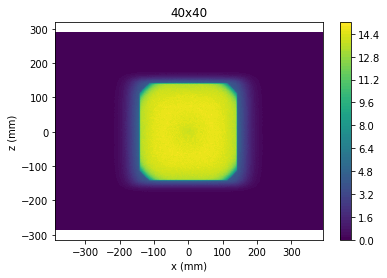

In [14]:
display(Markdown('## Approximate Agility Head Fluence'))

for key in keys:
    plt.figure()
    plt.contourf(coords_fluence[key][0], coords_fluence[key][2], approx_fluence[key], 100)
    plt.colorbar()
    plt.axis('equal')
    
    plt.title(key)
    plt.xlabel('x (mm)')
    plt.ylabel('z (mm)')

In [15]:
# index = 
# index

In [16]:
# 150 / scale_to_iso

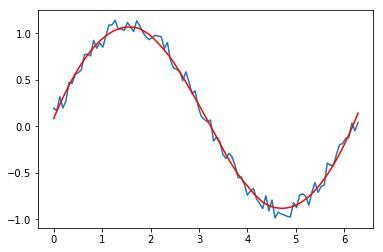

In [17]:
# https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = scipy.signal.savgol_filter(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

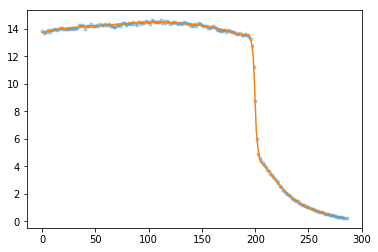

In [18]:
z_mid = np.where(coords_fluence[key][2] == 0)[0][0]
x_mid = np.where(coords_fluence[key][0] == 0)[0][0]

scale_to_iso = 100 / 70

# plt.plot(
#     coords_fluence['40x40'][0][x_mid:x_mid+140:] * scale_to_iso, 
#     approx_fluence['40x40'][z_mid, x_mid:x_mid+140:], '.', alpha=0.3)

# plt.plot(
#     -coords_fluence['40x40'][0][x_mid:x_mid-140:-1] * scale_to_iso, 
#     approx_fluence['40x40'][z_mid, x_mid:x_mid-140:-1], alpha=0.3)

# plt.plot(
#     coords_fluence['40x40'][2][z_mid:z_mid+140:] * scale_to_iso, 
#     approx_fluence['40x40'][z_mid:z_mid+140:, x_mid], alpha=0.3)

# plt.plot(
#     -coords_fluence['40x40'][2][z_mid:z_mid-140:-1] * scale_to_iso, 
#     approx_fluence['40x40'][z_mid:z_mid-140:-1, x_mid], alpha=0.3)

num_vals = 201

approx_radial_fluence = np.mean([
    approx_fluence['40x40'][z_mid, x_mid:x_mid+num_vals:],
    approx_fluence['40x40'][z_mid, x_mid:x_mid-num_vals:-1],
    approx_fluence['40x40'][z_mid:z_mid+num_vals:, x_mid],
    approx_fluence['40x40'][z_mid:z_mid-num_vals:-1, x_mid],
], axis=0)

scaled_x = coords_fluence['40x40'][0][x_mid:x_mid+num_vals:] * scale_to_iso
plt.plot(
    scaled_x,
    approx_radial_fluence, '.', alpha=0.3
)

interp = scipy.interpolate.UnivariateSpline(
    scaled_x,
    approx_radial_fluence, s=1, k=2
)



radial_fluence_x = np.arange(0, 270)
radial_fluence = interp(radial_fluence_x)

plt.plot(radial_fluence_x, radial_fluence)

smoothed = scipy.signal.savgol_filter(approx_radial_fluence, 7, 2)
# plt.plot(scaled_x, smoothed)


In [19]:
-coords_fluence['40x40'][2][z_mid:z_mid-140:-1]

array([ -0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139.])

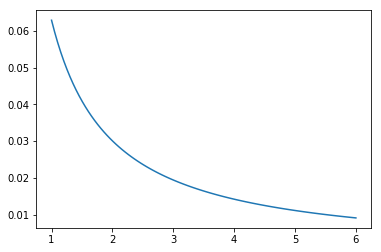

In [20]:
def create_fractional_photon_spectrum(mu, sigma):
    
    def fractional_photon_spectrum(energy):
        return (
            1 / (np.sqrt(2*np.pi) * sigma * energy) *
            np.exp(-((-np.log(energy) - mu)**2/(2*sigma**2)))
        )
        
    return fractional_photon_spectrum


fractional_photon_spectrum = create_fractional_photon_spectrum(2, 6)

E = np.linspace(1,6,100)
W = fractional_photon_spectrum(E)

plt.plot(E, W)

Text(0,0.5,'$\\mu / \\rho$ (cm$^2$/g)')

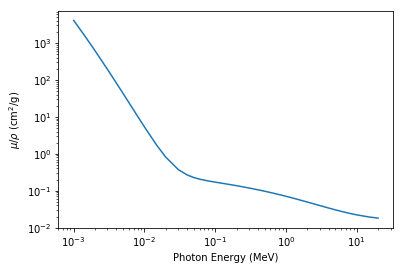

In [21]:
# Water https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/water.html

NIST_water_attenuation_table = np.array([
    [1.00000E-03, 4.078E+03, 4.065E+03],
    [1.50000E-03, 1.376E+03, 1.372E+03],
    [2.00000E-03, 6.173E+02, 6.152E+02],
    [3.00000E-03, 1.929E+02, 1.917E+02],
    [4.00000E-03, 8.278E+01, 8.191E+01],
    [5.00000E-03, 4.258E+01, 4.188E+01],
    [6.00000E-03, 2.464E+01, 2.405E+01],
    [8.00000E-03, 1.037E+01, 9.915E+00],
    [1.00000E-02, 5.329E+00, 4.944E+00],
    [1.50000E-02, 1.673E+00, 1.374E+00],
    [2.00000E-02, 8.096E-01, 5.503E-01],
    [3.00000E-02, 3.756E-01, 1.557E-01],
    [4.00000E-02, 2.683E-01, 6.947E-02],
    [5.00000E-02, 2.269E-01, 4.223E-02],
    [6.00000E-02, 2.059E-01, 3.190E-02],
    [8.00000E-02, 1.837E-01, 2.597E-02],
    [1.00000E-01, 1.707E-01, 2.546E-02],
    [1.50000E-01, 1.505E-01, 2.764E-02],
    [2.00000E-01, 1.370E-01, 2.967E-02],
    [3.00000E-01, 1.186E-01, 3.192E-02],
    [4.00000E-01, 1.061E-01, 3.279E-02],
    [5.00000E-01, 9.687E-02, 3.299E-02],
    [6.00000E-01, 8.956E-02, 3.284E-02],
    [8.00000E-01, 7.865E-02, 3.206E-02],
    [1.00000E+00, 7.072E-02, 3.103E-02],
    [1.25000E+00, 6.323E-02, 2.965E-02],
    [1.50000E+00, 5.754E-02, 2.833E-02],
    [2.00000E+00, 4.942E-02, 2.608E-02],
    [3.00000E+00, 3.969E-02, 2.281E-02],
    [4.00000E+00, 3.403E-02, 2.066E-02],
    [5.00000E+00, 3.031E-02, 1.915E-02],
    [6.00000E+00, 2.770E-02, 1.806E-02],
    [8.00000E+00, 2.429E-02, 1.658E-02],
    [1.00000E+01, 2.219E-02, 1.566E-02],
    [1.50000E+01, 1.941E-02, 1.441E-02],
    [2.00000E+01, 1.813E-02, 1.382E-02]
]).T

plt.loglog(NIST_water_attenuation_table[0], NIST_water_attenuation_table[1])
plt.xlabel('Photon Energy (MeV)')
plt.ylabel(r'$\mu / \rho$ (cm$^2$/g)')

Text(0,0.5,'$\\mu / \\rho$ (cm$^2$/g)')

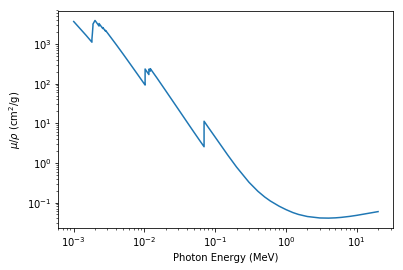

In [22]:
# Tungsten https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z74.html

NIST_tungsten_attenuation_table = np.array([
    [1.00000E-03, 3.683E+03, 3.671E+03],
    [1.50000E-03, 1.643E+03, 1.632E+03],
    [1.80920E-03, 1.108E+03, 1.097E+03],
    [1.80920E-03, 1.327E+03, 1.311E+03],
    [1.84014E-03, 1.911E+03, 1.883E+03],
    [1.87160E-03, 2.901E+03, 2.853E+03],
    [1.87160E-03, 3.170E+03, 3.116E+03],
    [2.00000E-03, 3.922E+03, 3.853E+03],
    [2.28100E-03, 2.828E+03, 2.781E+03],
    [2.28100E-03, 3.279E+03, 3.226E+03],
    [2.42350E-03, 2.833E+03, 2.786E+03],
    [2.57490E-03, 2.445E+03, 2.407E+03],
    [2.57490E-03, 2.599E+03, 2.558E+03],
    [2.69447E-03, 2.339E+03, 2.301E+03],
    [2.81960E-03, 2.104E+03, 2.071E+03],
    [2.81960E-03, 2.194E+03, 2.160E+03],
    [3.00000E-03, 1.902E+03, 1.873E+03],
    [4.00000E-03, 9.564E+02, 9.405E+02],
    [5.00000E-03, 5.534E+02, 5.423E+02],
    [6.00000E-03, 3.514E+02, 3.428E+02],
    [8.00000E-03, 1.705E+02, 1.643E+02],
    [1.00000E-02, 9.691E+01, 9.204E+01],
    [1.02068E-02, 9.201E+01, 8.724E+01],
    [1.02068E-02, 2.334E+02, 1.966E+02],
    [1.08548E-02, 1.983E+02, 1.684E+02],
    [1.15440E-02, 1.689E+02, 1.444E+02],
    [1.15440E-02, 2.312E+02, 1.889E+02],
    [1.18186E-02, 2.268E+02, 1.797E+02],
    [1.20998E-02, 2.065E+02, 1.699E+02],
    [1.20998E-02, 2.382E+02, 1.948E+02],
    [1.50000E-02, 1.389E+02, 1.172E+02],
    [2.00000E-02, 6.573E+01, 5.697E+01],
    [3.00000E-02, 2.273E+01, 1.991E+01],
    [4.00000E-02, 1.067E+01, 9.240E+00],
    [5.00000E-02, 5.949E+00, 5.050E+00],
    [6.00000E-02, 3.713E+00, 3.070E+00],
    [6.95250E-02, 2.552E+00, 2.049E+00],
    [6.95250E-02, 1.123E+01, 3.212E+00],
    [8.00000E-02, 7.810E+00, 2.879E+00],
    [1.00000E-01, 4.438E+00, 2.100E+00],
    [1.50000E-01, 1.581E+00, 9.378E-01],
    [2.00000E-01, 7.844E-01, 4.913E-01],
    [3.00000E-01, 3.238E-01, 1.973E-01],
    [4.00000E-01, 1.925E-01, 1.100E-01],
    [5.00000E-01, 1.378E-01, 7.440E-02],
    [6.00000E-01, 1.093E-01, 5.673E-02],
    [8.00000E-01, 8.066E-02, 4.028E-02],
    [1.00000E+00, 6.618E-02, 3.276E-02],
    [1.25000E+00, 5.577E-02, 2.761E-02],
    [1.50000E+00, 5.000E-02, 2.484E-02],
    [2.00000E+00, 4.433E-02, 2.256E-02],
    [3.00000E+00, 4.075E-02, 2.236E-02],
    [4.00000E+00, 4.038E-02, 2.363E-02],
    [5.00000E+00, 4.103E-02, 2.510E-02],
    [6.00000E+00, 4.210E-02, 2.649E-02],
    [8.00000E+00, 4.472E-02, 2.886E-02],
    [1.00000E+01, 4.747E-02, 3.072E-02],
    [1.50000E+01, 5.384E-02, 3.360E-02],
    [2.00000E+01, 5.893E-02, 3.475E-02]
]).T

plt.loglog(NIST_tungsten_attenuation_table[0], NIST_tungsten_attenuation_table[1])
plt.xlabel('Photon Energy (MeV)')
plt.ylabel(r'$\mu / \rho$ (cm$^2$/g)')

19.685

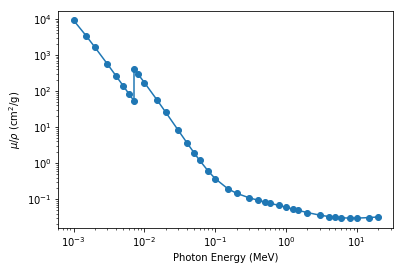

In [23]:
# Iron https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z26.html

NIST_iron_attenuation_table = np.array([
    [1.00000E-03, 9.085E+03, 9.052E+03],
    [1.50000E-03, 3.399E+03, 3.388E+03],
    [2.00000E-03, 1.626E+03, 1.620E+03],
    [3.00000E-03, 5.576E+02, 5.535E+02],
    [4.00000E-03, 2.567E+02, 2.536E+02],
    [5.00000E-03, 1.398E+02, 1.372E+02],
    [6.00000E-03, 8.484E+01, 8.265E+01],
    [7.11200E-03, 5.319E+01, 5.133E+01],
    [7.112001E-03, 4.076E+02, 2.978E+02],  # Adjusted for interpolation purposes
    [8.00000E-03, 3.056E+02, 2.316E+02],
    [1.00000E-02, 1.706E+02, 1.369E+02],
    [1.50000E-02, 5.708E+01, 4.896E+01],
    [2.00000E-02, 2.568E+01, 2.260E+01],
    [3.00000E-02, 8.176E+00, 7.251E+00],
    [4.00000E-02, 3.629E+00, 3.155E+00],
    [5.00000E-02, 1.958E+00, 1.638E+00],
    [6.00000E-02, 1.205E+00, 9.555E-01],
    [8.00000E-02, 5.952E-01, 4.104E-01],
    [1.00000E-01, 3.717E-01, 2.177E-01],
    [1.50000E-01, 1.964E-01, 7.961E-02],
    [2.00000E-01, 1.460E-01, 4.825E-02],
    [3.00000E-01, 1.099E-01, 3.361E-02],
    [4.00000E-01, 9.400E-02, 3.039E-02],
    [5.00000E-01, 8.414E-02, 2.914E-02],
    [6.00000E-01, 7.704E-02, 2.836E-02],
    [8.00000E-01, 6.699E-02, 2.714E-02],
    [1.00000E+00, 5.995E-02, 2.603E-02],
    [1.25000E+00, 5.350E-02, 2.472E-02],
    [1.50000E+00, 4.883E-02, 2.360E-02],
    [2.00000E+00, 4.265E-02, 2.199E-02],
    [3.00000E+00, 3.621E-02, 2.042E-02],
    [4.00000E+00, 3.312E-02, 1.990E-02],
    [5.00000E+00, 3.146E-02, 1.983E-02],
    [6.00000E+00, 3.057E-02, 1.997E-02],
    [8.00000E+00, 2.991E-02, 2.050E-02],
    [1.00000E+01, 2.994E-02, 2.108E-02],
    [1.50000E+01, 3.092E-02, 2.221E-02],
    [2.00000E+01, 3.224E-02, 2.292E-0]
]).T

plt.loglog(NIST_iron_attenuation_table[0], NIST_iron_attenuation_table[1], 'o-')
plt.xlabel('Photon Energy (MeV)')
plt.ylabel(r'$\mu / \rho$ (cm$^2$/g)')

# https://physics.nist.gov/PhysRefData/XrayMassCoef/tab1.html
iron_density = 7.874  # g/cm^3

# https://pdfs.semanticscholar.org/9726/2efd27488187b3351516a247e57dd79cf0aa.pdf
approximate_6MV_flatenning_filter_centre_thickness = 2.5 # cm of steel

central_ff_thickness = approximate_6MV_flatenning_filter_centre_thickness * iron_density  # g / cm^2
central_ff_thickness

## Guess at FF steel rayline thickness

Text(0,0.5,'z (mm)')

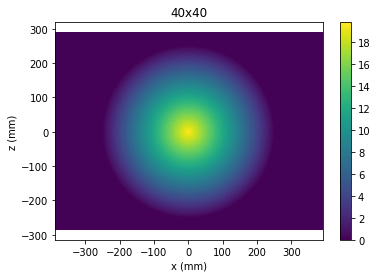

In [24]:
display(Markdown('## Guess at FF steel rayline thickness'))

key = '40x40'
primary_col_radius = 10 * 50 / 2 # mm

def calc_ff_thickness_guess(distance_from_centre):
    distance_from_centre = np.array(distance_from_centre)
    thickness = (1 - distance_from_centre / primary_col_radius) * central_ff_thickness
    if len(np.shape(distance_from_centre)) == 0:
        if thickness < 0:
            thickness = 0
    else:
        thickness[thickness < 0] = 0
    
    
    return thickness


x = coords_fluence[key][0]
z = coords_fluence[key][2]

distance_from_centre = np.sqrt(x[:, None]**2 + z[None, :]**2)
ff_thickness = calc_ff_thickness_guess(distance_from_centre)

plt.figure()
plt.contourf(coords_fluence[key][0], coords_fluence[key][2], ff_thickness.T, 100)
plt.colorbar()
plt.axis('equal')

plt.title(key)
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')

In [25]:
len(np.shape(np.array(0)))

0

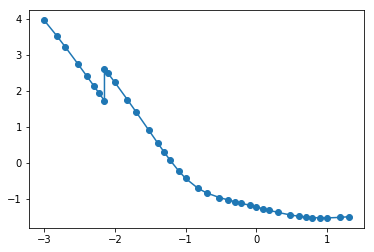

In [26]:
plt.plot(np.log10(NIST_iron_attenuation_table[0]), np.log10(NIST_iron_attenuation_table[1]), 'o-')

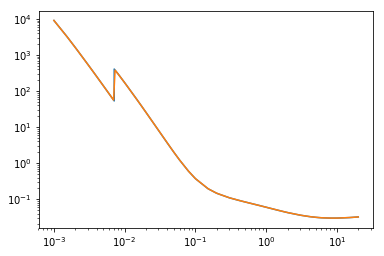

In [27]:
steel_interp = scipy.interpolate.interp1d(np.log(NIST_iron_attenuation_table[0]), np.log(NIST_iron_attenuation_table[1]))

def steel_attenuation(energy):
    return np.exp(steel_interp(np.log(energy)))

E = np.exp(np.linspace(np.log(0.001), np.log(20), 200))
attenuation = steel_attenuation(E)

plt.loglog(NIST_iron_attenuation_table[0], NIST_iron_attenuation_table[1])
plt.loglog(E, attenuation, '-')

Text(0,0.5,'Normalised fluence fraction')

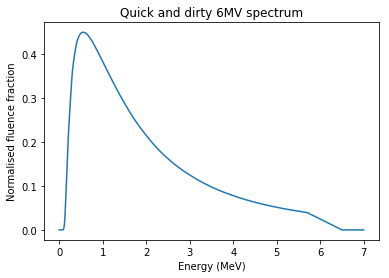

In [28]:
# A quick and dirty approximation of the energy spectrum

def create_quick_and_dirty_spectrum(energy, mu, sigma, linear_start, cutoff, thickness):

    fractional_photon_spectrum = create_fractional_photon_spectrum(mu, sigma)

    def initial_stage_spectrum(energy):
        initial_weight = fractional_photon_spectrum(energy)
        fraction_not_attenuated = np.exp(-steel_attenuation(energy) * thickness)

        return fraction_not_attenuated * initial_weight


    initial_part_of_linear = initial_stage_spectrum(linear_start)
    def linear_portion(energy):
        return (
            (1 - (energy - linear_start) / (cutoff - linear_start)) * 
            initial_part_of_linear)

    
    def get_rough_spectrum_fraction(energy):   
#         weight_of_6MeV

        final_weight = initial_stage_spectrum(energy)
        final_weight[energy>=cutoff] = 0
        in_linear_section = np.logical_and(
            energy>=linear_start, energy<cutoff)
        final_weight[in_linear_section] = linear_portion(
            energy[in_linear_section])

        return final_weight

    W = fractional_photon_spectrum(energy)
    rough_spectrum = get_rough_spectrum_fraction(energy)
    normalisation = np.trapz(rough_spectrum, energy)

    def normalised_rough_spectrum_fraction(energy):
        return get_rough_spectrum_fraction(energy) / normalisation
    
    return normalised_rough_spectrum_fraction


energy = np.linspace(0.001, 7, 1000)
normalised_rough_spectrum_fraction = create_quick_and_dirty_spectrum(
    energy, 0.2, 1.3, 5.7, 6.5, central_ff_thickness)
normalised_rough_spectrum = normalised_rough_spectrum_fraction(energy)
plt.plot(energy, normalised_rough_spectrum)

plt.title('Quick and dirty 6MV spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalised fluence fraction')

Text(0,0.5,'Normalised fluence fraction')

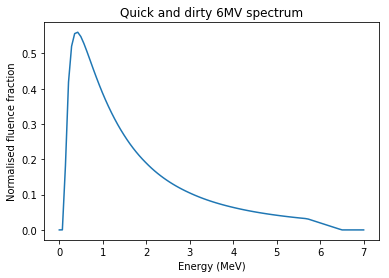

In [29]:
def get_spectrum(energy_steps, distance_from_centre):
    """Distance from centre defined in mm at iso
    """
    thickness = calc_ff_thickness_guess(distance_from_centre)    

    normalised_rough_spectrum_fraction = create_quick_and_dirty_spectrum(
        energy_steps, 0.2, 1.3, 5.7, 6.5, thickness)
    normalised_rough_spectrum = normalised_rough_spectrum_fraction(energy_steps)
    
    return normalised_rough_spectrum


energy_steps = np.linspace(0.001, 7, 100)
normalised_rough_spectrum = get_spectrum(energy_steps, 100)
plt.plot(energy_steps, normalised_rough_spectrum)

plt.title('Quick and dirty 6MV spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalised fluence fraction')

In [30]:
type(np.array(0))

numpy.ndarray

In [31]:
water_interp = scipy.interpolate.interp1d(
    np.log(NIST_water_attenuation_table[0]), 
    np.log(NIST_water_attenuation_table[1]))

def water_attenuation(energy):
    return np.exp(water_interp(np.log(energy)))

(0, 12.295292330366944)

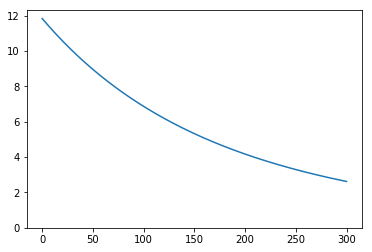

In [32]:
def get_mono_terma(energy_steps, off_axis_distance_at_iso, water_equivalent_depth):
    """water_equivalent_depth in mm
    """
    return (
        get_spectrum(energy_steps, off_axis_distance_at_iso) * 
        np.exp(-water_attenuation(energy_steps) * water_equivalent_depth / 10) *
        energy_steps * water_attenuation(energy_steps)
    )


def get_spectrum_terma(water_equivalent_depth, off_axis_distance_at_iso):
    energy_steps = np.linspace(0.001, 7, 1000)
    return np.sum(get_mono_terma(
        np.expand_dims(energy_steps, axis=0), 
        off_axis_distance_at_iso,
        np.expand_dims(water_equivalent_depth, axis=1)
    ), axis=1)


depth = np.linspace(0, 300, 200)
terma = get_spectrum_terma(depth, 100)

plt.plot(depth, terma)
plt.ylim([0, None])

In [33]:
# get_spectrum_terma(np.ravel(distance_to_surface))

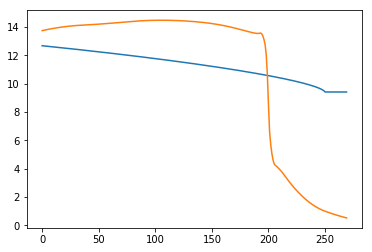

In [34]:
fluence_deposited = [
    get_spectrum_terma([1], x_val)[0]
    for x_val in radial_fluence_x
]
plt.plot(radial_fluence_x, fluence_deposited)

plt.plot(radial_fluence_x, radial_fluence)

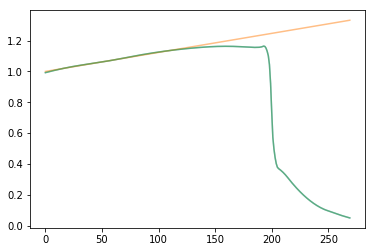

In [35]:
fluence_proportion = radial_fluence / fluence_deposited

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(radial_fluence_x[0:130], fluence_proportion[0:130])

plt.plot(radial_fluence_x, fluence_proportion / intercept, alpha=0.5)

def get_fluence_scaling_linear(off_axis_distance_at_iso):
    return (off_axis_distance_at_iso * slope + intercept) / intercept

plt.plot(radial_fluence_x, get_fluence_scaling_linear(radial_fluence_x), alpha=0.5)


get_fluence_scaling = scipy.interpolate.UnivariateSpline(
    radial_fluence_x,
    fluence_proportion / intercept, s=0, k=2
)

plt.plot(radial_fluence_x, get_fluence_scaling(radial_fluence_x), alpha=0.5)

In [36]:
def get_scaled_spectrum_terma(water_equivalent_depth, off_axis_distance_at_iso):
    return (
        get_spectrum_terma(water_equivalent_depth, off_axis_distance_at_iso) * 
        get_fluence_scaling(off_axis_distance_at_iso))

In [37]:
SSD = 900

def get_distance_to_surface(depth_at_iso):
    distance_to_surface_fraction = depth_at_iso / (depth_at_iso + SSD)

    distance_to_source = np.sqrt(radial_fluence_x ** 2 + (SSD + depth_at_iso) ** 2)
    distance_to_surface = distance_to_source * distance_to_surface_fraction
    
    return distance_to_surface

get_distance_to_surface(100)

array([100.        , 100.00005   , 100.0002    , 100.00045   ,
       100.0008    , 100.00124999, 100.00179998, 100.00244997,
       100.00319995, 100.00404992, 100.00499988, 100.00604982,
       100.00719974, 100.00844964, 100.00979952, 100.01124937,
       100.01279918, 100.01444896, 100.01619869, 100.01804837,
       100.019998  , 100.02204757, 100.02419707, 100.0264465 ,
       100.02879585, 100.03124512, 100.03379429, 100.03644336,
       100.03919232, 100.04204116, 100.04498988, 100.04803846,
       100.0511869 , 100.05443518, 100.05778331, 100.06123125,
       100.06477902, 100.06842659, 100.07217395, 100.0760211 ,
       100.07996803, 100.08401471, 100.08816114, 100.0924073 ,
       100.09675319, 100.10119879, 100.10574409, 100.11038907,
       100.11513372, 100.11997803, 100.12492197, 100.12996554,
       100.13510873, 100.14035151, 100.14569387, 100.15113579,
       100.15667726, 100.16231826, 100.16805878, 100.1738988 ,
       100.17983829, 100.18587725, 100.19201565, 100.19

In [38]:
def get_off_axis_distance_at_iso(off_axis_distance, depth):
    vertical_distance_to_source = depth + SSD
    off_axis_distance_at_iso = 1000 / vertical_distance_to_source * off_axis_distance
    
    return off_axis_distance_at_iso

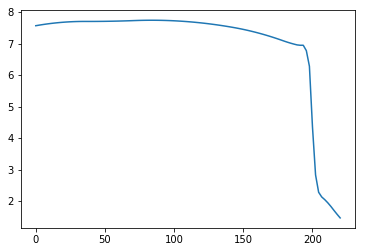

In [39]:
def terma_profile_at_depth(x_i, depth):
    terma = [
        get_scaled_spectrum_terma([distance_to_surface], x_val)[0]
        for distance_to_surface, x_val 
        in zip(get_distance_to_surface(depth), get_off_axis_distance_at_iso(x_i, depth))
    ]
    
    return terma

x_i = np.linspace(0, 220, 100)

# Approximate half profile of TERMA at 10 cm depth
plt.plot(x_i, terma_profile_at_depth(x_i, 100))

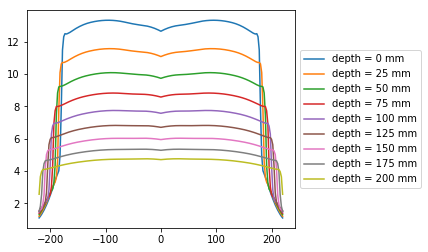

In [40]:
fig = plt.figure()
ax = plt.subplot(111)

for depth in np.arange(0, 225, 25):
    terma = terma_profile_at_depth(x_i, depth)
    ax.plot(
        np.concatenate([-x_i[-1::-1], x_i]), 
        np.concatenate([terma[-1::-1], terma]), 
        label="depth = {} mm".format(depth))
    

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))